In [1]:
# Import the necessary modules
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [21]:
clinicalDATA = pd.read_csv("raw_data/clinicaltrial_data.csv")
mouseDATA = pd.read_csv("raw_data/mouse_drug_data.csv")

print(f"Clinical data count = {len(clinicalDATA)}")
print(f"Mouse data count = {len(mouseDATA)}\n")

# Merge the two datasets on "Mouce ID" so that all data is in one table

merged_df = pd.merge(clinicalDATA, mouseDATA, how='outer', on='Mouse ID')
print(merged_df.count())
print("")
print(merged_df["Mouse ID"].value_counts().head())

# Note, there are some mice that have only one or few timepoints, hence not complete data and should be filtered
# complete data are those that have a full ending timepoint of 45

complete_ID = merged_df.loc[merged_df["Timepoint"]==merged_df["Timepoint"].max(),"Mouse ID"]
complete_DF = merged_df.loc[merged_df["Mouse ID"].isin(complete_ID)]
complete_DF.head()

Clinical data count = 1893
Mouse data count = 250

Mouse ID              1906
Timepoint             1906
Tumor Volume (mm3)    1906
Metastatic Sites      1906
Drug                  1906
dtype: int64

g989    26
g791    10
t198    10
z969    10
w151    10
Name: Mouse ID, dtype: int64


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [5]:
DrugGroup = complete_DF.groupby(["Drug","Timepoint"])
DrugGroup = pd.DataFrame(DrugGroup["Tumor Volume (mm3)"].mean())
DrugGroup.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.638812
          10                  43.288693
          15                  42.241369
          20                  41.046149

In [6]:
Delta = DrugGroup.groupby('Drug')['Tumor Volume (mm3)'].diff()
Delta = pd.DataFrame(Delta)
Delta = Delta.fillna(0)

Delta.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                   -0.361188
          10                  -1.350120
          15                  -1.047323
          20                  -1.195220

In [7]:
# Pivot1 = pd.pivot_table(complete_DF, values='Tumor Volume (mm3)', index="Timepoint",columns=['Drug'], aggfunc=np.mean)
# print(Pivot1)

Pivot = DrugGroup.pivot_table(values='Tumor Volume (mm3)', index="Timepoint",columns='Drug')
Pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.638812,46.476532,47.554028,47.989945,46.867079,46.978130,47.552586,43.632879,47.897880,47.034879
10,43.288693,48.574593,49.404738,50.135365,48.885177,49.218669,49.062043,42.111555,49.732453,48.954360
15,42.241369,50.175249,51.384368,53.000687,51.482335,51.351923,51.211355,40.858715,51.794414,50.950521
20,41.046149,52.187140,53.543237,55.563182,54.074872,54.187082,53.173343,39.762729,54.643903,53.082970
25,39.719733,54.220869,56.224678,58.728153,57.203463,57.456515,55.053524,38.792697,56.848698,55.315109
30,38.803875,56.899911,58.532347,62.169148,59.684628,59.985903,57.643879,38.387121,60.154564,57.520661
35,37.772247,58.794783,60.693045,64.310632,62.852580,63.150796,59.742383,37.496514,62.674480,60.089372
40,36.958001,61.258323,62.704291,67.081986,65.789380,65.692814,63.064520,36.574081,65.021614,62.916692


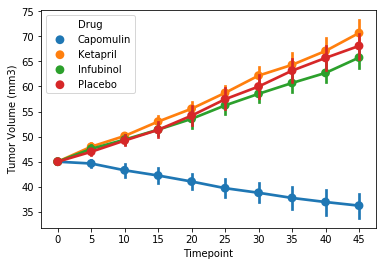

In [37]:
# CondencedPivot = Pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
# CondencedPivot = CondencedPivot.reset_index().melt("Timepoint", var_name='Drug',  value_name='Tumor Volume (mm3)')

# sns.pointplot( x="Timepoint", y = "Tumor Volume (mm3)", data=CondencedPivot, hue = "Drug")


CondencedData = complete_DF.loc[complete_DF["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"])]

sns.pointplot( x="Timepoint", y = "Tumor Volume (mm3)", data=CondencedData, hue = "Drug")


In [9]:
MetaGroup = complete_DF.groupby(["Drug","Timepoint"])
MetaGroup = pd.DataFrame(MetaGroup["Metastatic Sites"].mean())
MetaGroup.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.190476
          10                 0.380952
          15                 0.428571
          20                 0.714286

In [10]:
MetaDelta = MetaGroup.groupby('Drug')['Metastatic Sites'].diff()
MetaDelta = pd.DataFrame(MetaDelta)
MetaDelta = MetaDelta.fillna(0)

Delta.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                   -0.361188
          10                  -1.350120
          15                  -1.047323
          20                  -1.195220

In [11]:
MetaPivot = MetaGroup.pivot_table(values='Metastatic Sites', index="Timepoint",columns='Drug')
MetaPivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,0.190476,0.384615,0.111111,0.545455,0.230769,0.545455,0.428571,0.15,0.363636,0.142857
10,0.380952,0.615385,0.666667,0.909091,0.538462,0.909091,0.714286,0.25,0.454545,0.357143
15,0.428571,0.846154,0.666667,1.181818,0.769231,1.454545,1.000000,0.30,0.545455,0.857143
20,0.714286,1.384615,0.666667,1.636364,1.076923,1.909091,1.285714,0.30,0.727273,1.357143
25,0.857143,1.769231,0.777778,2.181818,1.384615,2.272727,1.285714,0.60,1.000000,1.785714
30,1.095238,2.000000,1.333333,2.545455,1.923077,2.545455,1.571429,0.70,1.363636,2.000000
35,1.190476,2.153846,1.555556,3.000000,2.076923,2.909091,2.000000,0.90,1.454545,2.285714
40,1.380952,2.461538,1.888889,3.090909,2.307692,3.090909,2.428571,1.10,1.636364,2.785714


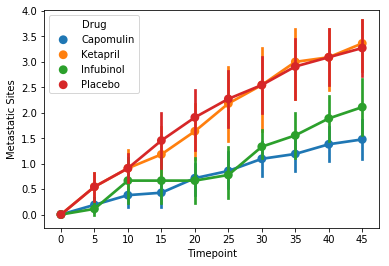

In [38]:
# CondencedMetaPivot = MetaPivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
# CondencedMetaPivot = CondencedMetaPivot.reset_index().melt("Timepoint", var_name='Drug',value_name='Metastatic Sites')

# sns.pointplot( x="Timepoint", y = "Metastatic Sites", data=CondencedMetaPivot, hue = "Drug")

sns.pointplot( x="Timepoint", y = "Metastatic Sites", data=CondencedData, hue = "Drug")

In [13]:
MouseGroup = merged_df.groupby(["Drug","Timepoint"])
MouseGroup = pd.DataFrame(MouseGroup["Mouse ID"].count())
MouseGroup.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [14]:
MousePivot = MouseGroup.pivot_table(values='Mouse ID', index="Timepoint",columns='Drug')
MousePivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


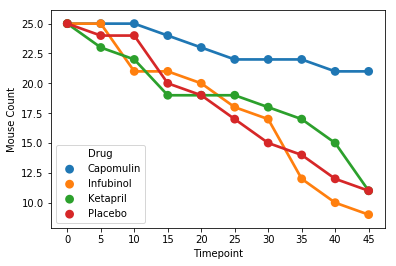

In [15]:
CondencedMouse = MousePivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
CondencedMouse = CondencedMouse.reset_index().melt("Timepoint", var_name='Drug',value_name='Mouse Count')

sns.pointplot( x="Timepoint", y = "Mouse Count", data=CondencedMouse, hue = "Drug")

In [65]:
PercentChange = (Pivot.loc[Pivot.index.max()]-Pivot.loc[Pivot.index.min()])/Pivot.loc[Pivot.index.min()]
PercentTumor = PercentChange.map('{:.2%}'.format)
PercentTumor

Drug
Capomulin    -19.48%
Ceftamin      42.52%
Infubinol     46.12%
Ketapril      57.03%
Naftisol      53.92%
Placebo       51.30%
Propriva      47.24%
Ramicane     -22.32%
Stelasyn      52.09%
Zoniferol     46.58%
dtype: object

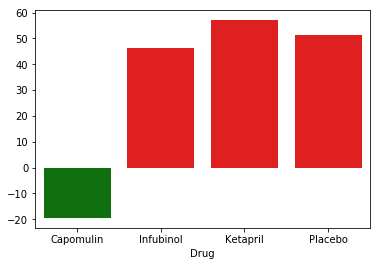

In [63]:
Test = PercentChange.loc[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

colors = ['red' if y >=0 else 'green' for y in Test]

sns.barplot(x=Test.index, y=Test*100, palette=colors)